In [ ]:
# Connecting to the google drive to upload the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import display

import spacy
spacy.cli.download("en_core_web_lg")

nlp= spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Importing thae data (Review data)

video_data = pd.read_csv("/content/drive/MyDrive/Project/eda_video1.csv")
toy_data   = pd.read_csv("/content/drive/MyDrive/Project/eda_toy1.csv")

# Importing thae data (Meta data)

video_meta_data = pd.read_csv("/content/drive/MyDrive/Project/meta_video.csv")
toy_meta_data   = pd.read_csv("/content/drive/MyDrive/Project/meta_toy.csv")

In [ ]:
print("Video Review Data\n")
display(video_data.head(2))
print("*****************************************************************************************************************************************************************************************\n\n")
print("Video Meta Data\n")
display(video_meta_data.head(2))
print("*****************************************************************************************************************************************************************************************\n\n")
print("Toy Review Data\n")
display(toy_data.head(2))
print("*****************************************************************************************************************************************************************************************\n\n")
print("Toy Meta Data\n")
display(toy_meta_data.head(2))

Video Review Data



,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


*****************************************************************************************************************************************************************************************


Video Meta Data



,Unnamed: 0,Unnamed: 0.1,asin,price,brand,also_buy,description
0,0,0,4983289,24.95,Dutch Blitz Games Co,['B00WIIPQEC'],['Blitz Vintage Card Game']
1,1,1,6466222,4.92,Lee Publications,"['B009SB7TI8', 'B009SB8Z1I']","['Marvel SuperHeroes themed ""magic ink"" colori..."


*****************************************************************************************************************************************************************************************


Toy Review Data



,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


*****************************************************************************************************************************************************************************************


Toy Meta Data



,Unnamed: 0,asin,price,brand,also_buy,description
0,0,4983289,24.95,Dutch Blitz Games Co,['B00WIIPQEC'],['Blitz Vintage Card Game']
1,1,6466222,4.92,Lee Publications,"['B009SB7TI8', 'B009SB8Z1I']","['Marvel SuperHeroes themed ""magic ink"" colori..."


In [ ]:
# Convarting price columns values string to flot.

def price_doll(df):
  price= []
  m =[]
  for i in df.price:
      if str(i).startswith('$'):
        value = float(i[1:])
        price.append(value)
        m.append(i)
  df.replace(m,price,inplace=True)

In [ ]:
price_doll(video_meta_data)
price_doll(toy_meta_data)

video_meta_data["price"]=pd.to_numeric(video_meta_data["price"])
toy_meta_data["price"]=pd.to_numeric(toy_meta_data["price"])

In [ ]:
print("********** video data **********\n")
display(video_data.info())
print("\n********** video meta data **********\n")
display(video_meta_data.info())
print("\n********** Toy data **********\n")
display(toy_data.info())
print("\n********** Toy meta data **********\n")
display(toy_meta_data.info())

********** video data **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228967 entries, 0 to 228966
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            228967 non-null  int64  
 1   reviewerID            228967 non-null  object 
 2   asin                  228967 non-null  object 
 3   reviewerName          228953 non-null  object 
 4   reviewText            228918 non-null  object 
 5   overall               228967 non-null  int64  
 6   summary               228957 non-null  object 
 7   reviewTime            228967 non-null  object 
 8   Reviews_orignal       228923 non-null  object 
 9   reviewText + summary  228967 non-null  object 
 10  reviewPolarity        228967 non-null  float64
 11  reviewAnalysis        228967 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 21.0+ MB


None


********** video meta data **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93529 entries, 0 to 93528
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    93529 non-null  int64  
 1   Unnamed: 0.1  93529 non-null  int64  
 2   asin          93529 non-null  object 
 3   price         93529 non-null  float64
 4   brand         93529 non-null  object 
 5   also_buy      93529 non-null  object 
 6   description   93529 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.0+ MB


None


********** Toy data **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166759 entries, 0 to 166758
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            166759 non-null  int64  
 1   reviewerID            166759 non-null  object 
 2   asin                  166759 non-null  object 
 3   reviewerName          166747 non-null  object 
 4   reviewText            166666 non-null  object 
 5   overall               166759 non-null  int64  
 6   summary               166759 non-null  object 
 7   reviewTime            166759 non-null  object 
 8   Reviews_orignal       166666 non-null  object 
 9   reviewText + summary  166759 non-null  object 
 10  reviewPolarity        166759 non-null  float64
 11  reviewAnalysis        166759 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 15.3+ MB


None


********** Toy meta data **********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93523 entries, 0 to 93522
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   93523 non-null  int64  
 1   asin         93523 non-null  object 
 2   price        93523 non-null  float64
 3   brand        93523 non-null  object 
 4   also_buy     93523 non-null  object 
 5   description  93523 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.3+ MB


None

In [ ]:
# Droping unwanted columns
video_data.drop(["Unnamed: 0"],axis=1,inplace=True)
toy_data.drop(["Unnamed: 0"],axis=1,inplace=True)
video_meta_data.drop(["Unnamed: 0"],axis=1,inplace=True)
toy_meta_data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
print("********** video data **********\n")
display(video_data.columns)
print("\n********** video meta data **********\n")
display(video_meta_data.columns)
print("\n********** Toy data **********\n")
display(toy_data.columns)
print("\n********** Toy meta data **********\n")
display(toy_meta_data.columns)

********** video data **********



Index(['reviewerID', 'asin', 'reviewerName', 'reviewText', 'overall',
       'summary', 'reviewTime', 'Reviews_orignal', 'reviewText + summary',
       'reviewPolarity', 'reviewAnalysis'],
      dtype='object')


********** video meta data **********



Index(['Unnamed: 0.1', 'asin', 'price', 'brand', 'also_buy', 'description'], dtype='object')


********** Toy data **********



Index(['reviewerID', 'asin', 'reviewerName', 'reviewText', 'overall',
       'summary', 'reviewTime', 'Reviews_orignal', 'reviewText + summary',
       'reviewPolarity', 'reviewAnalysis'],
      dtype='object')


********** Toy meta data **********



Index(['asin', 'price', 'brand', 'also_buy', 'description'], dtype='object')

In [ ]:
print("Shape of the video Data :",video_data.shape)
print("\nShape of the video meta Data :",video_meta_data.shape)
print("\nShape of the toy data Data :",toy_data.shape)
print("\nShape of the toy meta Data :",toy_meta_data.shape)

Shape of the video Data : (228967, 11)

Shape of the video meta Data : (93529, 6)

Shape of the toy data Data : (166759, 11)

Shape of the toy meta Data : (93523, 5)


In [ ]:
common_df = (video_data.merge(toy_data, how="inner", on="reviewerID"))

common_df.head(1)

,reviewerID,asin_x,reviewerName_x,reviewText_x,overall_x,summary_x,reviewTime_x,Reviews_orignal_x,reviewText + summary_x,reviewPolarity_x,...,asin_y,reviewerName_y,reviewText_y,overall_y,summary_y,reviewTime_y,Reviews_orignal_y,reviewText + summary_y,reviewPolarity_y,reviewAnalysis_y
0,ANW6EGY12V5XS,0700099867,Henri Savin,playing car racing games early beginning pc cu...,5,A 5 stars winner!,2011-10-19,I have been playing car racing games since the...,I have been playing car racing games since the...,0.314506,...,B0013IHSG2,Henri Savin,hard time believing politically correct days t...,3,Toyguns are getting hard to get by,2011-10-19,I have hard time believing that we have become...,I have hard time believing that we have become...,0.236905,Positive


In [ ]:
common_meta_df = (video_meta_data.merge(toy_meta_data, how="inner", on="asin"))

common_meta_df.head(1)

,Unnamed: 0.1,asin,price_x,brand_x,also_buy_x,description_x,price_y,brand_y,also_buy_y,description_y
0,0,4983289,24.95,Dutch Blitz Games Co,['B00WIIPQEC'],['Blitz Vintage Card Game'],24.95,Dutch Blitz Games Co,['B00WIIPQEC'],['Blitz Vintage Card Game']


In [ ]:
common_meta_df.shape

(97627, 10)

In [ ]:
#common_meta_df.to_csv("/content/drive/MyDrive/Untitled folder//meta_common.csv")

In [ ]:
common_df.set_index("reviewTime_x",inplace=True)
common_df.head(1)

,reviewerID,asin_x,reviewerName_x,reviewText_x,overall_x,summary_x,Reviews_orignal_x,reviewText + summary_x,reviewPolarity_x,reviewAnalysis_x,asin_y,reviewerName_y,reviewText_y,overall_y,summary_y,reviewTime_y,Reviews_orignal_y,reviewText + summary_y,reviewPolarity_y,reviewAnalysis_y
reviewTime_x,,,,,,,,,,,,,,,,,,,,
2011-10-19,ANW6EGY12V5XS,0700099867,Henri Savin,playing car racing games early beginning pc cu...,5,A 5 stars winner!,I have been playing car racing games since the...,I have been playing car racing games since the...,0.314506,Positive,B0013IHSG2,Henri Savin,hard time believing politically correct days t...,3,Toyguns are getting hard to get by,2011-10-19,I have hard time believing that we have become...,I have hard time believing that we have become...,0.236905,Positive


In [ ]:
# common_df.drop("reviewTime_y",axis=1,inplace=True)

In [ ]:
#common_df.to_csv("/content/drive/MyDrive/Untitled folder/Vader//common_df.csv")

In [ ]:
# Creating common dataframes

common_video_df = (video_data.merge(video_meta_data, how="inner", on="asin"))
common_toy_df = (toy_data.merge(toy_meta_data, how="inner", on="asin"))

In [ ]:
print("Shape of the combine video dataset (video rating and meta data) :",common_video_df.shape)
print("\nShape of the combine toy dataset (Toy rating and meta data) :",common_toy_df.shape)

Shape of the combine video dataset (video rating and meta data) : (34, 16)

Shape of the combine toy dataset (Toy rating and meta data) : (41966, 15)


In [ ]:
print("Video Review Data and Video Meta data\n")
display(common_video_df.head(2))
print("*****************************************************************************************************************************************************************************************\n\n")
print("Toy Review Data and Toy Meta data\n")
display(common_toy_df.head(2))

Video Review Data and Video Meta data



,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis,Unnamed: 0.1,price,brand,also_buy,description
0,A30GPTKHN5SXKI,B00002R108,David M Farnworth,hamha think item allow save title choice heres...,5,A good item if you've owned many titles in you...,2002-12-18,Hamha! I think this item will allow you to sa...,Hamha! I think this item will allow you to sa...,0.152857,Positive,1024,44.99,InterAct,"['B008B8QO0I', 'B019Z2Z51W', 'B06WWF9KB6', 'B0...",['Brand new. Please note these do NOT work wit...
1,A30GPTKHN5SXKI,B00002R108,David M Farnworth,hamha think item allow save title choice heres...,5,A good item if you've owned many titles in you...,2002-12-18,Hamha! I think this item will allow you to sa...,Hamha! I think this item will allow you to sa...,0.152857,Positive,3076,44.99,InterAct,"['B008B8QO0I', 'B019Z2Z51W', 'B06WWF9KB6', 'B0...",['Brand new. Please note these do NOT work wit...


*****************************************************************************************************************************************************************************************


Toy Review Data and Toy Meta data



,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis,price,brand,also_buy,description
0,A10WBU7X288RZY,1223063151,Amanda Lynn,tile lock addition makes lot easier use dont w...,5,We love this game!,2014-05-13,The tile lock addition makes this a lot easier...,The tile lock addition makes this a lot easier...,0.800,Highly Positive,13.79,Winning Moves Games,"['0877795967', 'B00TLEMRKM', 'B01N6PS4L0', '12...","['<h2>Tile Lock Scrabble</h2>', 'Web exclusive..."
1,A2WO7CURD15SXG,1223063151,Glen Whiltey,good version kids plastic locking pieces game ...,5,Good for kids,2014-04-25,This is a good version for the kids. The plast...,This is a good version for the kids. The plast...,0.225,Positive,13.79,Winning Moves Games,"['0877795967', 'B00TLEMRKM', 'B01N6PS4L0', '12...","['<h2>Tile Lock Scrabble</h2>', 'Web exclusive..."


In [ ]:
common_video_df.isnull().sum()

reviewerID              0
asin                    0
reviewerName            0
reviewText              0
overall                 0
summary                 0
reviewTime              0
Reviews_orignal         0
reviewText + summary    0
reviewPolarity          0
reviewAnalysis          0
Unnamed: 0.1            0
price                   0
brand                   0
also_buy                0
description             0
dtype: int64

In [ ]:
common_toy_df.isnull().sum()

reviewerID               0
asin                     0
reviewerName             2
reviewText              15
overall                  0
summary                  0
reviewTime               0
Reviews_orignal         15
reviewText + summary     0
reviewPolarity           0
reviewAnalysis           0
price                    0
brand                    0
also_buy                 0
description              0
dtype: int64

In [ ]:
# dropping null values

common_toy_df.dropna(inplace=True)

#####0

In [ ]:
display(toy_data.head(2))
display(video_data.head(2))

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive


,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive


In [ ]:
common= (video_data.merge(toy_data, how="inner", on="reviewerName"))

In [ ]:
print("Percentage of common customers :",round((int(len(common.reviewerName.unique()))/(int(video_data.reviewerName.unique().shape[0])
                                                +int(toy_data.reviewerName.unique().shape[0]))*100),2),"%")

Percentage of common customers : 4.79 %


In [ ]:
from collections import Counter
print("Top Customer in video common data : \n",Counter(common["reviewerName"]).most_common(10))

Top Customer in video common data : 
 [('Amazon Customer', 4223016), ('Chris', 33129), ('Michael', 27232), ('Mike', 23232), ('Kindle Customer', 20280), ('John', 17688), ('Stephanie', 17255), ('Matt', 17250), ('Steve', 13872), ('Alex', 13156)]


In [ ]:
common_customers=pd.DataFrame({"Customer names":['Amazon Customer','Chris',"Mike",'Kindle Customer','John','Stephanie','Matt','Steve',"Alex"],
             "count":[4223016,33129,23232,20280,17688,17255,17250,13872,13156]})
common_customers

,Customer names,count
0,Amazon Customer,4223016
1,Chris,33129
2,Mike,23232
3,Kindle Customer,20280
4,John,17688
5,Stephanie,17255
6,Matt,17250
7,Steve,13872
8,Alex,13156


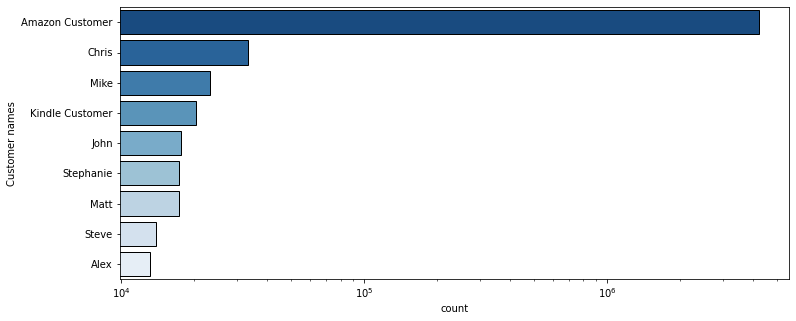

In [ ]:
from matplotlib import legend
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax1=plt.subplots(1,1,figsize=(12,5))
sns.barplot(y = common_customers["Customer names"], x = common_customers["count"], palette="Blues_r", orient="h",edgecolor="black",ax=ax1,log=True)
plt.show()

### Video and Toy Dataset

#### Video Games

In [ ]:
print("Shape of the combine video dataset (video rating and meta data) :",common_video_df.shape)
print("\nShape of the combine toy dataset (Toy rating and meta data) :",common_toy_df.shape)

Shape of the combine video dataset (video rating and meta data) : (34, 15)

Shape of the combine toy dataset (Toy rating and meta data) : (41949, 15)


In [ ]:
# FINDING THE LIST OF COMMON CUSTOMERS IN BOTH CATEGORIES (merging)(video data)

common_video= (video_data.merge(video_meta_data, how="inner", on="asin"))["reviewerID"].unique()
common_video

array(['A30GPTKHN5SXKI', 'A1DAZIO3Q8FNMR', 'APQ8ZK7Z3BYVS',
       'A2ZPCX9JXOQSS5', 'A1U1GYM2SIA2PY', 'A3UXYCUGIAM9HO',
       'AXYRE3ET1R5F4', 'A16ZFFYQ98RGX2', 'AWG2O9C42XW5G',
       'A1TD8YA6HL9YD7', 'A1MDIPRVX6C9DT', 'A9ZLR3UF0KDIN',
       'A2XA4XO3GPHZZE', 'A4HOVPF9HPQSN', 'A1UG7WMTXWSGZZ',
       'A3R8QJ2LVZ6FCJ', 'AFXF5FG6GRH7N'], dtype=object)

In [ ]:
(video_data.merge(video_meta_data, how="inner", on="asin"))["reviewerName"].unique()

array(['David M Farnworth', 'Glen', 'O. Arias', 'OboeDude "Oboe"',
       'Pebbles "Pebbles"', 'aaooppeerr', 'Batman "The bat"',
       'Craig Collins', 'David "Black Widow 2014"', 'D. Fox',
       'Jim Jones "Sam"', 'Miss', 'RattleHead',
       'Sam Maisel "samtheman_17"', '"thegamerjon"',
       'the_twins80 "rare_hunter_yugi"', 'Vegeta'], dtype=object)

In [ ]:
# FINDING THE LIST OF COMMON CUSTOMERS IN BOTH CATEGORIES (merging)(video data)

common_toy= (toy_data.merge(toy_meta_data, how="inner", on="asin"))["reviewerID"].unique()
common_toy

array(['A10WBU7X288RZY', 'A2WO7CURD15SXG', 'A3DE8HIPHNOR9L', ...,
       'AJWLN5Z6W97TM', 'A9JLE9BISQFUB', 'AWCJ12KBO5VII'], dtype=object)

In [ ]:
print("Common Customers in both datasets\n")
print("\n******************** common_Video_data ***********************\n")
display(common_video_df[["reviewerID","reviewerName","brand"]].head())
print("\n******************** common_toy_data ***********************\n")
display(common_toy_df[["reviewerID","reviewerName","brand"]].head())

Common Customers in both datasets


******************** common_Video_data ***********************



,reviewerID,reviewerName,brand
0,A30GPTKHN5SXKI,David M Farnworth,InterAct
1,A30GPTKHN5SXKI,David M Farnworth,InterAct
2,A1DAZIO3Q8FNMR,Glen,InterAct
3,A1DAZIO3Q8FNMR,Glen,InterAct
4,APQ8ZK7Z3BYVS,O. Arias,InterAct



******************** common_toy_data ***********************



,reviewerID,reviewerName,brand
0,A10WBU7X288RZY,Amanda Lynn,Winning Moves Games
1,A2WO7CURD15SXG,Glen Whiltey,Winning Moves Games
2,A3DE8HIPHNOR9L,"L. Davis ""LDMDAD""",Winning Moves Games
3,A3D44VGIO6RX6R,Marilyn,Winning Moves Games
4,A16J0ZE2YY07Q6,Needmore,Winning Moves Games


##### 1 
Customers who gave maximum ratings(video data)

In [ ]:
# customers Who gave 5 ratings (highest in video data)

for i in common_video_df[(common_video_df["overall"]==5)]["reviewerName"].unique():
  print(i)

David M Farnworth
Glen
O. Arias
Batman "The bat"
David "Black Widow 2014"
D. Fox
RattleHead
the_twins80 "rare_hunter_yugi"
Vegeta


##### 2
Customers who gave minimum ratings (video data)

In [ ]:
# customers Who gave less than 5 ratings (in video data)

for i in common_video_df[(common_video_df["overall"]<3)]["reviewerName"].unique():
  print(i)

Pebbles "Pebbles"
Miss


##### 3
Top Customers in video common data

In [ ]:
from collections import Counter 

print("Top Customer in video common data : \n",Counter(common_video_df["reviewerID"]).most_common(10))

Top Customer in video common data : 
 [('A30GPTKHN5SXKI', 2), ('A1DAZIO3Q8FNMR', 2), ('APQ8ZK7Z3BYVS', 2), ('A2ZPCX9JXOQSS5', 2), ('A1U1GYM2SIA2PY', 2), ('A3UXYCUGIAM9HO', 2), ('AXYRE3ET1R5F4', 2), ('A16ZFFYQ98RGX2', 2), ('AWG2O9C42XW5G', 2), ('A1TD8YA6HL9YD7', 2)]


In [ ]:
common_video_df["reviewAnalysis"].value_counts()

Negative    20
Positive    14
Name: reviewAnalysis, dtype: int64

##### 4
Product names where we get highest positive reviews (video data)

In [ ]:
%%time
# product names where we get highest positive reviews (video data)
n1 = common_video_df[(common_video_df.reviewAnalysis=="Positive")]["asin"].value_counts().index
m1 = common_video_df[(common_video_df.reviewAnalysis=="Positive")]
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
h1=pd.DataFrame()
h1["Product_ID"]=prd_id
h1["Product Name"]= product_name

CPU times: user 532 ms, sys: 10.6 ms, total: 543 ms
Wall time: 565 ms


In [ ]:
h1

,Product_ID,Product Name
0,B00005Y402,Gate Gaurdian


Gate Gaurdian has the highest positive reviews .

##### 5
Product names where we get highest neg reviews (video data)

In [ ]:
%%time
# product names where we get highest neg reviews (video data)

n1 = common_video_df[(common_video_df.reviewAnalysis=="Negative")]["asin"].value_counts().index
m1 = common_video_df[(common_video_df.reviewAnalysis=="Negative")]
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
h11=pd.DataFrame()
h11["Product_ID"]=prd_id
h11["Product Name"]= product_name

CPU times: user 1.51 s, sys: 25.8 ms, total: 1.53 s
Wall time: 1.57 s


In [ ]:
h11

,Product_ID,Product Name
0,B00005Y402,YuGiOh
1,B00002R108,Card


YuGiOh and Card has highest neg reviews in video game dataset .

In [ ]:
hl1 = [];hl2 = []
for i in h11["Product_ID"]:
  hl1.append(common_video_df[common_video_df["asin"]==i]["price"].values.sum())
  hl2.append(common_video_df[common_video_df["asin"]==i]["summary"].values[0])

In [ ]:
h11["Total_Sales"] = hl1
h11["Summary"] = hl2

In [ ]:
h11

,Product_ID,Product Name,Total_Sales,Summary
0,B00005Y402,YuGiOh,4799.76,A sacred treasure buried beneath the sands of ...
1,B00002R108,Card,449.90,A good item if you've owned many titles in you...


#### Toy and Games

##### 1
Top Customer names in toy data

In [ ]:
from collections import Counter 

print("Top Customer in toy common data : \n",Counter(common_toy_df["reviewerName"]).most_common(5))

Top Customer in toy common data : 
 [('Amazon Customer', 580), ('E. Kennedy', 214), ('Jennifer', 64), ('Amanda L. Davis', 56), ('Kindle Customer', 52)]


In [ ]:
k=[]
for i in ['Amazon Customer','E. Kennedy','Jennifer','Amanda L. Davis', 'Kindle Customer']:
  k.append(common_toy_df[common_toy_df["reviewerName"]==i].index)

k12 = pd.DataFrame({"Customer_Names":['Amazon Customer','E. Kennedy','Jennifer','Amanda L. Davis', 'Kindle Customer'],"index":k})

In [ ]:
p=[];q=[]
for i in range(0,len(k12)):
  l1 = sum(common_toy_df.price[k12["index"][i]].values)
  l2 = len(common_toy_df.price[k12["index"][i]])
  p.append(l1/l2)

for i in ['Amazon Customer','E. Kennedy','Jennifer','Amanda L. Davis', 'Kindle Customer']:
  q.append(common_toy_df[common_toy_df["reviewerName"]==i]["summary"].values[0])

k12["Avg_Price"]=p
k12["Summary"]=q

In [ ]:
k12

,Customer_Names,index,Avg_Price,Summary
0,Amazon Customer,"Int64Index([ 25, 49, 81, 141, 154,...",30.915086,Great game!
1,E. Kennedy,"Int64Index([ 463, 780, 781, 1002, 1003,...",19.148178,Great Game!
2,Jennifer,"Int64Index([ 806, 807, 3404, 3405, 4230,...",23.966406,Great memory game and for thematic play
3,Amanda L. Davis,"Int64Index([ 424, 824, 825, 1396, 1397,...",23.889107,Great Classic Children's Game
4,Kindle Customer,"Int64Index([ 664, 665, 1060, 1061, 1794,...",43.111154,Loved it


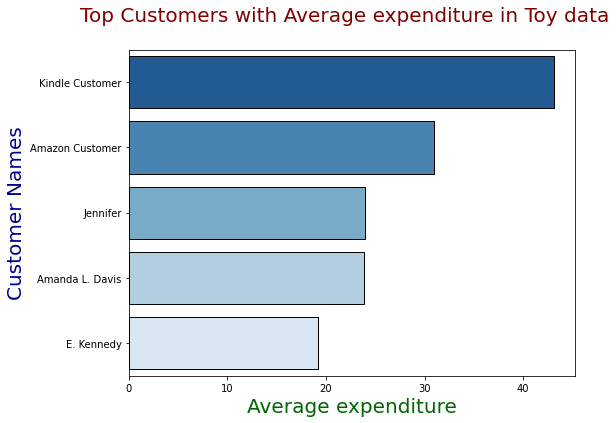

In [ ]:
# customers in common toy data whose number are highest

fig,ax1=plt.subplots(1,1,figsize=(8,6))
top_customer_toys =k12["Customer_Names"]
customer_counts_toys=k12["Avg_Price"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=k12.sort_values('Avg_Price',ascending = False).Customer_Names)

ax1.set_ylabel("Customer Names",size=20,color = "darkblue")
ax1.set_xlabel("Average expenditure",size=20,color="darkgreen")
plt.suptitle("Top Customers with Average expenditure in Toy data",size =20,color="maroon")
plt.show()

##### 2


###### 2.1
Customers who gave maximum ratings (toy data)

In [ ]:
# customers Who gave 5 ratings (highest in toy data)

for i in common_toy_df[(common_toy_df["overall"]==5)]["reviewerName"].unique():
  print(i,end=" ,")

Amanda Lynn ,Glen Whiltey ,L. Davis "LDMDAD" ,Needmore ,Dawn De Lorenzo "Author of Peanut Butter and ... ,J. Leffler "mom to 3 girls" ,Linda B ,Yodsta ,AL Smith ,Bryan Lewis ,Glen Hubbard ,Marc Quattromani ,Samson ,Zack Davisson ,Cody Carlson ,Dorothy J Johnson ,Nightmare ,R. B. Ray "Rus Ray" ,Strahd ,Amazon Customer ,Dave "DM" ,justanothermom ,Kaui "I love to walk and run listening to aud... ,Nikodem Leszek Blach "Nik" ,Running Bill ,Sandy Zimmerman ,Stephen Mann ,T. Gilbert ,102Riley "102riley" ,ChaosMom ,C. Stebbing "kt stebs" ,em and en ,hollys hoffbrau ,Jbpage67 ,Kayla Selans "Photographer who loves to shop :)" ,Mandy ,Mary VanMeerbeek ,Rvmfletch ,sf mama ,BassJas ,Crazyhorse ,F. A. Unterharnscheidt "unterlegend" ,Jason ,Jeffrey Sears ,Mike C. ,Peter Mancini ,R C FORSAITH ,rdw ,Ron Higgins ,Stena Swanson ,Thomas A. Reed "Jane! Stop this crazy thing!" ,tommytwo ,Bdavius ,El_Tonio ,Geoff Dearing ,Jason A. Kaas "jkaas" ,Neko-san ,Ryan Aech ,Mark E ,Jason D. ,Karen Baker "city mama" ,

###### 2.2
Customers who gave minimum ratings (toy data)

In [ ]:
# customers Who gave 1 ratings (lowest in toy data)

for i in common_toy_df[(common_toy_df["overall"]==1)]["reviewerName"].unique():
  print(i,end=" ,")

DB ,Tribulation Exodus ,gamereviewer ,Martin Philpott ,augustsmom ,cessyd "cessy" ,Jocelyn ,Mandi ,Cartuni "In every real man a child is hidden ... ,Amber Schafer ,Peanut's Mommy "Peanut's Mommy" ,Yoshi "Yoshi" ,loce_the_wizard "loce_the_wizard" ,Mary A. "Grammy of 5" ,oma ,bananas4amazon ,Veggie ,F. Romain "pics4nic" ,D. Hill ,K. Glazier "Amazed!" ,BGB ,Grandma M ,J. McGuinnes ,KNSudha ,klpmommy ,carolinaautoguy ,Jace E. Mouse ,Ozziesgirl ,Valerie ,Faith Webster ,october_mommy ,Pamela Roth "Bubbels" ,star arrow ,Amanda L. Davis ,Fun Babysitter ,justme "me" ,S. Shelton "sal4gal" ,Cheenasharma "unsean" ,Joy ,LKD ,VeganLawyerMama ,Amazon Customer "Nina" ,Eric A. Kugler ,IMHO "IMHO" ,matt kline ,Ogur ,TABB ,Georgia Mimi ,Frances Hunt "banker" ,kathykreates ,Kelly Anderson ,L. Bartlett "lisaB" ,Patricia A. Redler "ibcrafter" ,Grandmother of Twin Boys ,Laura ,Susie "Bookworm" ,PeaTee ,cubgirl ,Expectant Customer ,Kins ,WM ,Christopher Spence "Lucky Dad" ,KC ,T. Russo "Capt Tom" ,Amazon Cust

##### 3
Top Brands in toy data 

In [ ]:
print("Top Brands in toy common data : \n",Counter(common_toy_df["brand"]).most_common(10))

Top Brands in toy common data : 
 [('Melissa & Doug', 7385), ('Fisher-Price', 2123), ('LEGO', 1582), ('Learning Resources', 1150), ('LeapFrog', 870), ('Hasbro', 815), ('Ravensburger', 729), ('Mattel', 717), ('ALEX Toys', 675), ('Monster High', 674)]


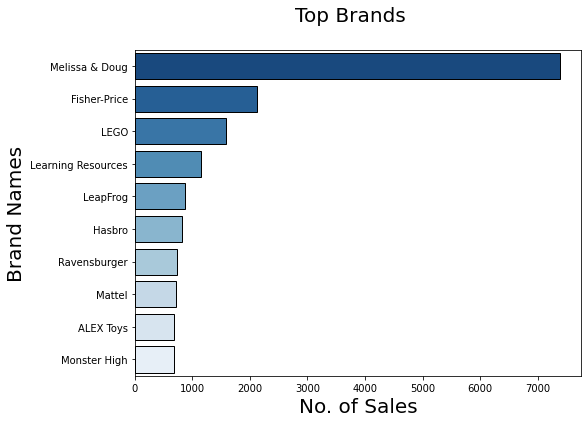

In [ ]:
# brands in common toy data whose number are highest

fig,ax1=plt.subplots(1,1,figsize=(8,6))
top_customer_toys =['Melissa & Doug','Fisher-Price', 'LEGO','Learning Resources','LeapFrog','Hasbro', 'Ravensburger','Mattel','ALEX Toys','Monster High']
customer_counts_toys=[7387, 2123 , 1584, 1150, 872,815,730,717,675,674]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 )
ax1.set_ylabel("Brand Names",size=20,color = "black")
ax1.set_xlabel("No. of Sales",size=20,color="black")
plt.suptitle("Top Brands",size =20,color="black")
plt.show()

##### 4
Top brands in toy data whose total price is highest

In [ ]:
from collections import Counter 

print("Top Customer in toy common data : \n",Counter(common_toy_df["brand"]).most_common(10))

Top Customer in toy common data : 
 [('Melissa & Doug', 7385), ('Fisher-Price', 2123), ('LEGO', 1582), ('Learning Resources', 1150), ('LeapFrog', 870), ('Hasbro', 815), ('Ravensburger', 729), ('Mattel', 717), ('ALEX Toys', 675), ('Monster High', 674)]


In [ ]:
#  brands in common toy data whose average price is highest

k=[];q=[]
x1 =['Melissa & Doug','Fisher-Price','LEGO','Learning Resources','LeapFrog','Hasbro','Ravensburger','Mattel','ALEX Toys','Monster High']
for i in x1:
  k.append(common_toy_df[common_toy_df["brand"]==i]["price"].sum())
  q.append(common_toy_df[common_toy_df["brand"]==i]["summary"].values[0])

k13 = pd.DataFrame({"Brand_Names":x1,"Total_Sales":k,"Summary":q})


In [ ]:
k13

,Brand_Names,Total_Sales,Summary
0,Melissa & Doug,125965.23,Great Puzzle
1,Fisher-Price,133512.72,Great Pull Toy but Not as a Phone
2,LEGO,147696.55,Love it!
3,Learning Resources,23103.97,One of our kids' favorites!
4,LeapFrog,21127.44,EVERY PRESCHOOL CHILD NEEDS TO OWN THIS LEAPST...
5,Hasbro,33092.72,Fun Game for Kids
6,Ravensburger,22267.64,Awesome Game
7,Mattel,28099.33,"GREAT GAME, Shoddy Construction"
8,ALEX Toys,11838.01,It does the job.
9,Monster High,31284.22,"Create, create, create"


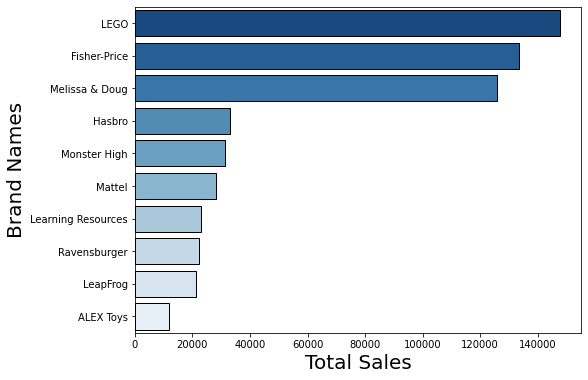

In [ ]:
# brands in common roy data whose number are highest

fig,ax1=plt.subplots(1,1,figsize=(8,6))
top_customer_toys =k13.Brand_Names
customer_counts_toys=k13.Total_Sales
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=k13.sort_values("Total_Sales",ascending=False)["Brand_Names"])
ax1.set_ylabel("Brand Names",size=20,color = "black")
ax1.set_xlabel("Total Sales",size=20,color="black")
#plt.suptitle("",size =20,color="black")
plt.show()

##### 5
Highest Recommended products to the customers in toy data

In [ ]:
# unique recommended products

l=[]
for i in common_toy_df[(common_toy_df["reviewerName"]=='Amazon Customer')]["also_buy"].unique():
  l.append(i)

print(l)

["['1601251505', '1601252161', '1601251831', '1601258879', '1601258887', '1601252463', '1601254369', '1601255616', '1601254725', '1601259506', '1601259492', '1601255470', '1601253907', '198101313X', '160125671X', 'B01ABST9S4', '1601251955', '1640780076', '1601255004', '160125217X', '1601255578', '0786966718', '1601252366', '0786965592', 'B0794Z8XRP', '1601259794', '1601252854', '1601257457', 'B0771RV2MZ', '1601255381', '078696619X', '1601256698', '1601252994', '1601259808', 'B07CVTY5NL', '1601255837', '0786966319', 'B07B9VDFMC', 'B01M1CRRY3', '1601259255', '1601259719', '1601252692', '1601253591', '1976371457', 'B01N2RZVOU', '0786965622', '0786966297', 'B06XWRPBV3', '0786965606', '1936781921', '1640780068', 'B01MSX6KLW', '1601256302', '1545516480', '0786966300', '1640780599', '1640780564', '0786955708', '1936876922', '1601256264', 'B07436SKXQ', '1601257902', 'B0792TQX7C', '1640780319', 'B00SI774U6', '1601252684', 'B06XNQXM11', 'B01MDJNE93', '1601255276', 'B06WLQP1SB', 'B01NBIJZAN', '16

In [ ]:
print("Top product ids recommended to the customers in Toy common data : \n",Counter(common_toy_df["also_buy"]).most_common(5))

Top product ids recommended to the customers in Toy common data : 
 [("['B00NHQF5ZO', 'B00NHQF626', 'B075QRYDFB', 'B00NHQF65S', 'B00NHQF6MG', 'B00NHQFA1I', 'B07D4B7MZD', 'B06XFYYPQW', 'B00K5W9TLY', 'B002RL7VNY', 'B00NHQFA68', 'B00LUIKYES', 'B0085Y3YV0', 'B00CGDU88S', 'B015EQL09E', 'B00SZS3IDK', 'B079FQG4ZG', 'B00NHQFA5E', 'B0192F7GFK', 'B07D4C69GK', 'B01IO152AO', 'B01ATIJ5SA', 'B079VSX7MS', 'B019YHUXDI', 'B003A5RTHO', 'B01KPH2KIM', 'B071HQGV5F', 'B00TWJTUZ6', 'B07GPGTP9S', 'B00X6H23H2', 'B071NJYVX7', 'B017B1ALPY', 'B072BHBJF1', 'B00H58BP72', 'B00NKOW7EK', 'B008KQ1XKC', 'B071VN2GWR', 'B01KKTNB7O', 'B017B1ASVG', 'B01KJEOCDW', 'B01N02WKQ5', 'B01H3Y278I', '0756686067', 'B007WSS1AO', 'B07G4R3HD5', 'B01CU9WX08', 'B00NHQF9VE', 'B071HQC3B7', 'B071L67QZF']", 294), ("['B000Y887XK', 'B00WTDXSDM', '1338112473', 'B00704IO48', 'B000BURAP2', 'B071GCGP1T', 'B00JYCPRSA', '0545703301', 'B01LX5NY95', 'B0006O8Q7Y', 'B000NQMAFO', 'B00I9KDFK0', 'B01LWMTZ7I', 'B0006N6USM', 'B0006N6UPU', 'B00QZ2PV4C', 'B001W7

In [ ]:
Common_toys_recommendation =pd.DataFrame({"Recommended_Product_sets":["Product_set_1","Product_set_2","Product_set_3","Product_set_4","Product_set_5"],
                                          "Recommended_Products":["['B00NHQF5ZO', 'B00NHQF626', 'B075QRYDFB', 'B00NHQF65S', 'B00NHQF6MG', 'B00NHQFA1I', 'B07D4B7MZD', 'B06XFYYPQW', 'B00K5W9TLY', 'B002RL7VNY', 'B00NHQFA68', 'B00LUIKYES', 'B0085Y3YV0', 'B00CGDU88S', 'B015EQL09E', 'B00SZS3IDK', 'B079FQG4ZG', 'B00NHQFA5E', 'B0192F7GFK', 'B07D4C69GK', 'B01IO152AO', 'B01ATIJ5SA', 'B079VSX7MS', 'B019YHUXDI', 'B003A5RTHO', 'B01KPH2KIM', 'B071HQGV5F', 'B00TWJTUZ6', 'B07GPGTP9S', 'B00X6H23H2', 'B071NJYVX7', 'B017B1ALPY', 'B072BHBJF1', 'B00H58BP72', 'B00NKOW7EK', 'B008KQ1XKC', 'B071VN2GWR', 'B01KKTNB7O', 'B017B1ASVG', 'B01KJEOCDW', 'B01N02WKQ5', 'B01H3Y278I', '0756686067', 'B007WSS1AO', 'B07G4R3HD5', 'B01CU9WX08', 'B00NHQF9VE', 'B071HQC3B7', 'B071L67QZF']",
                                                      "['B000Y887XK', 'B00WTDXSDM', '1338112473', 'B00704IO48', 'B000BURAP2', 'B071GCGP1T', 'B00JYCPRSA', '0545703301', 'B01LX5NY95', 'B0006O8Q7Y', 'B000NQMAFO', 'B00I9KDFK0', 'B01LWMTZ7I', 'B0006N6USM', 'B0006N6UPU', 'B00QZ2PV4C', 'B001W7YXYO', 'B0160JB7IS', 'B00BGYRIU4', 'B000FK3WDC', 'B07J11X71X', 'B00DW1JT5G', 'B00HUBBDIK', 'B00GAC6470', 'B075VZJ7C2', 'B073P3919F', 'B0713SB2VC', 'B00JYCPX4I', 'B0164WC4RY', '0545396344', 'B00G70DFC2', 'B01CY9ALOY', 'B001DNHYC0', 'B07D3G1C5D', 'B011HXHI2G', 'B07C78Y3YF', 'B0016ISNW2', '1999914724', 'B074TG46CZ', 'B01N6UHPSE', 'B00ITX1K4K', 'B01KJEOCDW', 'B002VLUI9E', 'B079MJ97XR', 'B014JUWR7K', 'B00HEYGOJQ', 'B07CTGTRB6', 'B07GLPMQ3H', 'B000BXKN30', 'B01KMMAAFA', 'B004MB7H1S', 'B003WFKOSS', 'B01N374DI5', 'B0032UKTXI', 'B01FSV2YYU', 'B072J1X677', 'B00GJXICV6', 'B07G33YBVQ', 'B07BHFPNY1', 'B01ESZPRHI', 'B00E24BM2U', 'B003HE3DJQ', 'B009CP5XK6', 'B0147LMQ7W', 'B0757LKW6T', 'B077NT45YH', 'B07GDN48ZF', 'B00R5MPDQM', 'B01M9JRWIR', 'B0763TLL6V', 'B01KFKC2VE', 'B01KJENV48', 'B015RN61C0', 'B07BZB8K64', 'B06XX79W45', 'B0160JCC5U', 'B008J87PVC', 'B01BNR4TGO', 'B01MUQX9R2', 'B01HXND5XK', 'B00ZL85BXM', 'B06WRN3G9Q', 'B0799734SJ', 'B074TCJMQW', 'B000BUW7E6', 'B07FB2VN8L', 'B07BKB7LGY', '1583940537', 'B01ECEAGP8', 'B0792VGBYL', 'B014HPF5G2', 'B06X9G5VP6', 'B07BQWV423', 'B07CT1XTPM', '1426320965', 'B000NX0IQK', 'B07F2SW1JN']",
                                                      "['1426309201', '0375828826', 'B000099Z8H', '1426316992', '0062381830', 'B003R68WF4', 'B06XWMS4NB', 'B00I9KDFK0', 'B0007CGKN2', 'B000099Z90', 'B000066CMG', '1426324251', 'B0000632R8', 'B00IIVMYQ6', 'B01BOVZS28', '142630739X', '1770850023', 'B07BFNWVY8', 'B000BURAP2', 'B073P759QX', 'B01DBUB1AI', 'B003TJ1JX6', 'B00UJGUBWW', '1426306083', 'B00ITX1K4K', 'B00GVHEQV0', '1101933828', '0545273307', '0761166599', 'B06X169227', 'B0160JB7IS', '0761166513', 'B075TG2Q7F', 'B003SN8TB8', 'B07BFNN6JT', 'B00LWVS4PE', 'B00FZ2R2PE', 'B000HGJJ7W', 'B016PHFY3Y', 'B00HUBBDIK', 'B01N6AU8P1', 'B01MYNTZ85', 'B00D8STBHY', 'B0160JBS5K', 'B0763TLL6V', '1426313764', 'B078ZHR3YS', 'B07CWM5LQH', 'B00OZZNF3U', 'B01BT87R16', 'B00TF805DK', 'B0162AI724', 'B075VZJ7C2', 'B01N28BZ5L', 'B07FPGL1CP', 'B0795XSYZC', 'B01MUDW7PS', 'B0007Y4DLG', 'B004MB7H1S', 'B000ZPF906', '0761166602', 'B01N6B8SX0', 'B01DY818JG', 'B0011TN7QI', 'B011M0XXXM', '0062352156', 'B01CK78BLA', 'B07C2YMFVQ', 'B01LQCIL88', 'B01IFMFXV0', 'B008FD8ETS', 'B005DPWECE', 'B004ALKLR2', 'B07852818T', 'B0160JBGRA', 'B0007WJ2B4', 'B000063XJL', 'B000NQMAFO', 'B0013BL3LK', 'B003AIM52A', 'B0160JCC5U', 'B01C3DSKTY', 'B016PHFTD4', 'B012WE6Q1S', 'B01FSV2YYU', '9627866350', 'B00000K3BR', 'B00WTDXSDM', '0800788036', 'B07B4MTWTX', 'B007TIRBBC', 'B00BAPQMFG', 'B07H2F9FCD', 'B003VPUCAO', 'B07DF15GHY']",
                                                      "['B01J2RYK8E', 'B07GX6STBY', 'B01J2RNU9Y', 'B01J2RUR5O', 'B076C1NFTR', 'B077LTF9VM', 'B01MRG7T0D', 'B01HQVQ63A', 'B00JMN0FN8', 'B077J982VT', 'B00KHHKANI', 'B0116ET2X4', 'B077JBMG3W', 'B00N36C6BE', 'B00ABA0ZOA', 'B07GLD9Z8Y', 'B01M4S54JJ', 'B017237OJW', 'B00D4NJSBW', 'B07BQJTJ92', 'B00V155S46', 'B01IA9R2TY', 'B06XYL6Y5C', 'B073WH7HWR', 'B013PE868A', 'B073WHY6TH', 'B01FSV380Y', 'B07HH9218W', 'B01MU9K3XU', 'B010TQY7A8', 'B076ZWRR68', 'B01BOV6566', 'B077S5SB6L', 'B010TU7LP2', 'B07BMLQBM1', 'B075CVZ4KY', 'B00004TZY8', 'B073BZ2XRP', 'B014Q1XX9S', 'B07D5QHKJN', 'B073WH4YG3', 'B015HQYDJU', 'B00UNOGK48', 'B01N02V6GH', 'B01IWALX00', 'B073R59XYF', 'B018OE6UYI', 'B01HQVCRKG', 'B07F2P3MM1', 'B07CKRSDLT', 'B01KGM8A26', 'B07CVM9HNQ', 'B00D8STBHY', 'B01M5KEOI6', 'B00TLEMRKM', 'B000050GET', 'B00IL5XY9K', 'B0778TY7XP', 'B07F5L6QPH', 'B00V42YPKO', 'B01FST8A90', 'B010LAUDIM', 'B07K71T6G9', 'B075YDRGCT', 'B07146ZQPP', 'B01N4MXCK4', 'B00000IVAK', 'B01M0XH7TJ', 'B01BLGILR0', 'B000GBA60W', 'B07HS1VW4B', 'B00A2F7JBG', 'B06XCXFBWC', 'B076W2B841', 'B076PRWVFG', 'B01LRO61WS', 'B00PJKCXJC', 'B00WFJJND4', 'B00112CHD4', 'B00X7CBP2U', 'B079997BXY', 'B01LXXCFST', 'B0145GMV7Y', 'B0119K8ILW', 'B014YZHW4S', 'B01ALHAN80', 'B017LTZGGU', 'B07BB1KTX8', 'B01J2R98HW', 'B078HQJMYL', 'B00112CHCK', 'B00LWF7KEQ', 'B071HSYM8J', 'B07DLT9KGN', 'B003EYUTW8', 'B0147LN0L8']",
                                                      "['B00008BFZH', 'B071X6YSJZ', 'B008PEKYA4', 'B0013BL3LK', '0545703301', 'B00CBFX9WI', '0763695041', 'B01CGQYBA0', 'B071KT3MSN', 'B01M5GJFQ1', 'B00KAS5GC4', 'B075VZJ7C2', 'B00VKRK7K0', 'B01KUXW6NU', 'B07C68Y5V1', 'B07CNDG65B', 'B0711MHKDZ', '1591747694', 'B00ITX1K4K', 'B004YHZE0G', 'B00VYAFTEM', 'B014993TCI', 'B07DF46VLV', 'B000FGECAI', '1465451358', '0545085365', 'B0176IEUH2', 'B07BFQN5KH', 'B074TCJMQW', 'B01D37OYQW', 'B000BURAP2', 'B00GGY85EC', 'B00008W73Z', 'B075RS1DK9', 'B00000IWD4', 'B07B5YTV83', 'B01I56RV0C', 'B00OZZNF3U', 'B074WC4NHW', 'B01D37PKM4', 'B0002AHQWS', 'B0160JB7IS', '0670016616', 'B06ZXS2BMD', 'B000NQMAFO', 'B01BEPHH4Q', 'B01ANVU7R6', 'B07BF7HQCR', '1465435468', 'B00CAWP9YI', 'B004MB7H1S', 'B00000DMER', 'B00I9KDFK0', 'B00IUAAK2A', '0761189416', 'B0164WC4RY', 'B071FN6KXK', 'B007EA4UBY', 'B07CQ9YSJ2', 'B00U26V4VQ', 'B01CY9ALOY', '1441312315', 'B072N2ZDD8', '1338219634', 'B0160JCC5U', 'B01MUHDRZY', 'B004OYYAUE', '1484905849', '142631695X', 'B07BMSBD3F', 'B07KPZ8RSZ', '0545703212', '1580625576', 'B000HGJJ7W', 'B01FST8A90', 'B002NGOH1W', '0399544224', '0448464950', 'B0160JBGRA', 'B07DLRMG95', 'B00AU56C5W', 'B00006JZCG', '1912286432', '0545935202', 'B009VE38CI', 'B000BXKN30', '1338137204', '1338106457', '0375813659', '0545935180', 'B01KJEOCDW', 'B077MRB975', 'B07BDZZRR3', 'B00SKURVKY', 'B01ATU556O', 'B074K87TN1', 'B073VTCS66', 'B0157IHJMQ']"],
                                          "Count":[294,292,204,204,196]})

In [ ]:
Common_toys_recommendation

,Recommended_Product_sets,Recommended_Products,Count
0,Product_set_1,"['B00NHQF5ZO', 'B00NHQF626', 'B075QRYDFB', 'B0...",294
1,Product_set_2,"['B000Y887XK', 'B00WTDXSDM', '1338112473', 'B0...",292
2,Product_set_3,"['1426309201', '0375828826', 'B000099Z8H', '14...",204
3,Product_set_4,"['B01J2RYK8E', 'B07GX6STBY', 'B01J2RNU9Y', 'B0...",204
4,Product_set_5,"['B00008BFZH', 'B071X6YSJZ', 'B008PEKYA4', 'B0...",196


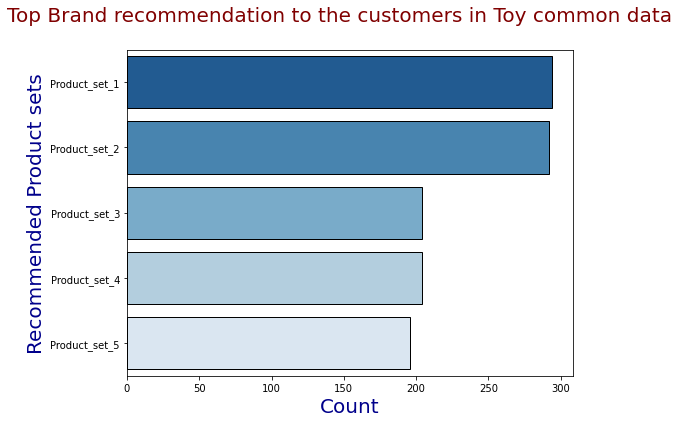

In [ ]:
# Top Brand recommendation to the customers in Toy common data

fig,ax1=plt.subplots(1,1,figsize=(8,6))
top_customer_toys = Common_toys_recommendation["Recommended_Product_sets"]
customer_counts_toys= Common_toys_recommendation["Count"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 )
ax1.set_ylabel("Recommended Product sets",size=20,color = "darkblue")
ax1.set_xlabel("Count",size=20,color="darkblue")
plt.suptitle("Top Brand recommendation to the customers in Toy common data ",size =20,color="maroon")
plt.show()

##### 6
Product names and avg price where we get highest highly positive reviews (toy data)

In [ ]:
%%time
# product names where we get highest highly positive reviews (toy data)

n1 = common_toy_df[(common_toy_df.reviewAnalysis=="Highly Positive")]["asin"].value_counts().index
m1 = common_toy_df[(common_toy_df.reviewAnalysis=="Highly Positive")]
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
g1=pd.DataFrame()
g1["Product_ID"]=prd_id
g1["Product Name"]= product_name

CPU times: user 1min 2s, sys: 278 ms, total: 1min 2s
Wall time: 1min 7s


In [ ]:
for i in g1["Product Name"]:
  print("(",i,")",end=",")


( 4x4 ),( Cookies ),( Classic ),( Babydoll Magic Doll ),( Blade ),( 3yo ),( Ultra Stomp Rocket ),( 2yo ),( Solar System Puzzle ),( RC ),( color!Love ),( Classic Peg Puzzle Bundle ),( Bought ),( PASTEL COOKWARE PLAYSET ),( 3yo ),( Explorer ),( Red Wagon ),( Kaleidoscope ),( Puzzle ),( Magic ),( Ninjago ),( Eagle Talon Castle ),( Rainbow Stacker ),( Thomas ),( Pokemon Cars ),( Penguin ),( Classic ),( Dino ),( Classic ),( Crayola Color Wonder ),( Bruder ),( Pluto ),( Finn McMissile #2 ),( Eclipse Doll ),( B&W ),( I am Very Happy ),( Bruder ),( mellisa ),( Intex Waterslide ),( Blade ),( memy ),( Lightsabers ),( Cuddly Elmo ),( Batman ),( amscan ),( Dino ),( Lalaloopsys ),( Vampire+Batman+ 4.99 ),( Tornado Tube ),( Kryptonian Armor ),( Frozen ),( B-29 RC ),( F-35 ),( Cerberus ),( 3yo ),( G1 ),( Styracosaurus ),( Droids ),( Spider ),( TMNT ),( Bought ),( braclet ),( Cerise ),( Batman ),( Ninjago ),( Cuddlekins ),( Rhino ),( Seaside ),( Folkmanis Shark Puppet ),( Pacific Play ),( Plan ),( 7yo

4x4,Babydoll Magic Doll,Ultra Stomp Rocket,Solar System Puzzle ,Classic Peg Puzzle Bundle,PASTEL COOKWARE PLAYSET,Eagle Talon Castle are few products which has highest highly positive reviews .

In [ ]:
l2=["4x4","Babydoll Magic Doll","Ultra Stomp Rocket","Solar System Puzzle" ,"Classic Peg Puzzle Bundle","PASTEL COOKWARE PLAYSET","Eagle Talon Castle"]
for i in l2:
  display(g1[g1["Product Name"]==i])

,Product_ID,Product Name
0,B000N5QNSK,4x4


,Product_ID,Product Name
3,B001B2TZV6,Babydoll Magic Doll


,Product_ID,Product Name
6,B0006O8Q7Y,Ultra Stomp Rocket


,Product_ID,Product Name
8,B00009ZKRO,Solar System Puzzle


,Product_ID,Product Name
11,B000KWJSKG,Classic Peg Puzzle Bundle


,Product_ID,Product Name
13,B000GR75SC,PASTEL COOKWARE PLAYSET


,Product_ID,Product Name
21,B006O6FI5Q,Eagle Talon Castle


In [ ]:
h2=pd.DataFrame({"Product_ID":["B000N5QNSK","B001B2TZV6","B0006O8Q7Y","B00009ZKRO","B000KWJSKG","B000GR75SC","B006O6FI5Q"],
              "Product Name":l2})
h2

,Product_ID,Product Name
0,B000N5QNSK,4x4
1,B001B2TZV6,Babydoll Magic Doll
2,B0006O8Q7Y,Ultra Stomp Rocket
3,B00009ZKRO,Solar System Puzzle
4,B000KWJSKG,Classic Peg Puzzle Bundle
5,B000GR75SC,PASTEL COOKWARE PLAYSET
6,B006O6FI5Q,Eagle Talon Castle


In [ ]:
k=[];q=[]

for i in h2["Product_ID"]:
  k.append(common_toy_df[common_toy_df["asin"]==i]["price"].sum())
  q.append(common_toy_df[common_toy_df["asin"]==i]["summary"].values[0])

h2["Total_Sales"]=k
h2["Summary"]=q

In [ ]:
h2

,Product_ID,Product Name,Total_Sales,Summary
0,B000N5QNSK,4x4,2910.84,Barely worth it
1,B001B2TZV6,Babydoll Magic Doll,546.70,super cute
2,B0006O8Q7Y,Ultra Stomp Rocket,2230.76,"Great idea, poor execution"
3,B00009ZKRO,Solar System Puzzle,983.18,This is a great quality puzzle
4,B000KWJSKG,Classic Peg Puzzle Bundle,1347.63,okay
5,B000GR75SC,PASTEL COOKWARE PLAYSET,664.89,super cute
6,B006O6FI5Q,Eagle Talon Castle,873.31,Nephew loved it.


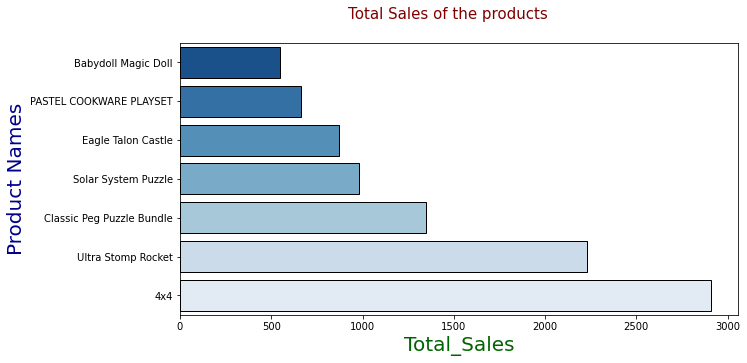

In [ ]:
# Average price of the products where we have positive reviews

fig,ax1=plt.subplots(1,1,figsize=(10,5))
top_customer_toys = h2["Product Name"]
customer_counts_toys= h2["Total_Sales"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=h2.sort_values("Total_Sales")["Product Name"])

ax1.set_ylabel("Product Names",size=20,color = "darkblue")
ax1.set_xlabel("Total_Sales",size=20,color="darkgreen")
plt.suptitle("Total Sales of the products ",size =15,color="maroon")
plt.show()

##### 7
Product names and Average Price where we get highest positive reviews (toy data)

In [ ]:
%%time
# product names where we get highest positive reviews (toy data)
n1 = common_toy_df[(common_toy_df.reviewAnalysis=="Positive")]["asin"].value_counts()[:100].index
m1 = common_toy_df[(common_toy_df.reviewAnalysis=="Positive")]
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
g2=pd.DataFrame()
g2["Product_ID"]=prd_id
g2["Product Name"]= product_name

CPU times: user 3min 18s, sys: 1.39 s, total: 3min 19s
Wall time: 3min 21s


In [ ]:
for i in g2["Product Name"]:
  print("(",i,")",end=",")

( Ultra ),( 8yo ),( Caterpillars ),( Minecraft ),( Matchbox ),( Classic ),( Corrugated Cardboard Storage Box ),( Family ),( Bought ),( m&d ),( 4yo ),( the Story Cubes ),( Yikes ),( Light Puzzle Rack ),( Scattergories ),( Playskool ),( Ultra Stomp Rocket ),( 3yo ),( 6yo ),( theScotch Gift Wrap Cutter ),( itunes ),( Bought ),( the Bubble Generator ),( sorting4 ),( m&d ),( toybox ),( Learn Car Carrier ),( RC ),( S800 ),( 4yo ),( DS ),( Doug-7 ),( 9&10 ),( Pathfinder ),( figurines!Some ),( M&D Reusable Sticker Pads ),( Classic ),( Seaplane ),( toybox ),( Bought ),( qualityCons:1 ),( 34;let ),( Wishlist ),( Car Carrier ),( 6yo ),( casketball ),( Zebra ),( Pluto ),( sturdy.- 100 ),( Playstations ),( Classic ),( sets!)-These ),( Qualtiy ),( ALOT ),( mosaic ),( 4yo ),( FUN toy ),( Magnetic Puzzle ),( Imaginext ),( 7yo ),( 34;the ),( Mazes ),( use.*Only ),( Crayola ),( Classic ),( mellisa ),( Cozy Coupe ),( Pringles ),( Baby Stella ),( Snail Pace Race ),( Shining Armor ),( Magic 8 ),( Crayola B

In [ ]:
jk =["Minecraft","Matchbox","m&d","Light Puzzle Rack","Scattergories","Playskool"]
po =[]
for i in jk:
  po.append(g2[g2["Product Name"]==i]["Product_ID"].values)
po

[array(['B00000JIVS'], dtype=object),
 array(['B000N5QNSK'], dtype=object),
 array(['B000090W81', 'B0007Y4DLG'], dtype=object),
 array(['B000088UPW'], dtype=object),
 array(['B00112CHCK'], dtype=object),
 array(['B00005N9EE'], dtype=object)]

In [ ]:
x22 = ['B00000JIVS','B000N5QNSK','B000090W81','B000088UPW','B00112CHCK','B00005N9EE']

k=[];q=[];o=[]

for i in x22:
  k.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Positive")]["price"].sum())
  o.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Positive")]["brand"].values[0])
  q.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Positive")]["Reviews_orignal"].values[0])


In [ ]:
gh1 = pd.DataFrame({"Product_Id":x22,"Brand Names":o,"Product Names":jk,"Total Sales":k,"Reviews":q})
gh1

,Product_Id,Brand Names,Product Names,Total Sales,Reviews
0,B00000JIVS,LEGO,Minecraft,2004.60,What a great addition to our daughters ledo fr...
1,B000N5QNSK,Battat,Matchbox,2286.00,"My husband owns a contracting business, so our..."
2,B000090W81,Melissa & Doug,m&d,1538.90,My daughter got this set as a birthday present...
3,B000088UPW,Melissa & Doug,Light Puzzle Rack,978.18,I love this puzzle storage. It's a great way t...
4,B00112CHCK,Mattel,Scattergories,2539.80,I have played this since college and love it. ...
5,B00005N9EE,Playskool,Playskool,3469.02,This toy is like one I had as a child which is...


In [ ]:
gh1=gh1.sort_values("Total Sales",ascending=True,ignore_index=True)
gh1

,Product_Id,Brand Names,Product Names,Total Sales,Reviews
0,B000088UPW,Melissa & Doug,Light Puzzle Rack,978.18,I love this puzzle storage. It's a great way t...
1,B000090W81,Melissa & Doug,m&d,1538.90,My daughter got this set as a birthday present...
2,B00000JIVS,LEGO,Minecraft,2004.60,What a great addition to our daughters ledo fr...
3,B000N5QNSK,Battat,Matchbox,2286.00,"My husband owns a contracting business, so our..."
4,B00112CHCK,Mattel,Scattergories,2539.80,I have played this since college and love it. ...
5,B00005N9EE,Playskool,Playskool,3469.02,This toy is like one I had as a child which is...


In [ ]:
for i in gh1.Reviews:
  print(i,"\n")

I love this puzzle storage. It's a great way to organize my daughters puzzles. I might buy the small case for the smaller puzzles. 

My daughter got this set as a birthday present and she loves to bake and serve her cake. It's a cute set but does have several small pieces so be careful. 

What a great addition to our daughters ledo friends for Christmas! She loves adding the small things on the plate to help them stay in place! 

My husband owns a contracting business, so our kids are into power tools and construction in general.  I reviewed this and researched it, and Santa got it for our 3.5 yr old.  I did actually log in here to make sure my review was fresh in my mind, but what I just realized is that in the time it took me to sit down and start typing, she had taken it apart and put most of it back together herself.  She's really enjoying it.  So I can't say it's that bad.  That being said, I  was disappointed upon opening the box.  Although the instructions start with each piece 

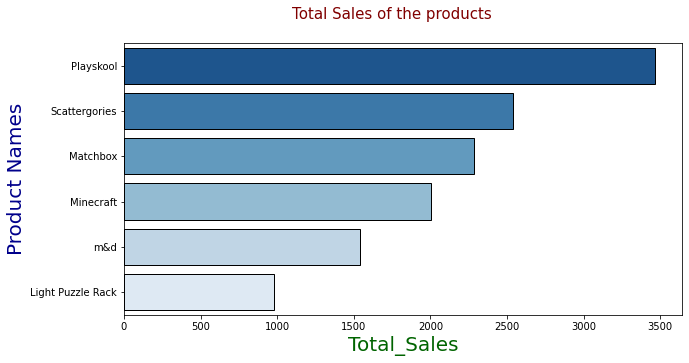

In [ ]:
# Average price of the products where we have positive reviews

fig,ax1=plt.subplots(1,1,figsize=(10,5))
top_customer_toys = gh1["Product Names"]
customer_counts_toys= gh1["Total Sales"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=gh1.sort_values("Total Sales",ascending=False)["Product Names"])

ax1.set_ylabel("Product Names",size=20,color = "darkblue")
ax1.set_xlabel("Total_Sales",size=20,color="darkgreen")
plt.suptitle("Total Sales of the products ",size =15,color="maroon")
plt.show()

Playskool,Minecraft,Scattergories,Matchbox,m&d and Light Puzzle Rack are few products which has highest positive reviews and Playskool has highest sales among them .

##### 8
Product names where we get highest neg reviews (toy data)

In [ ]:
%%time
# product names where we get highest neg reviews (toy data)
n1 = common_toy_df[(common_toy_df.reviewAnalysis=="Negative")]["asin"].value_counts()[:100].index
m1 = common_toy_df[(common_toy_df.reviewAnalysis=="Negative")]
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
g3=pd.DataFrame()
g3["Product_ID"]=prd_id
g3["Product Name"]= product_name

CPU times: user 42.8 s, sys: 320 ms, total: 43.1 s
Wall time: 43.2 s


In [ ]:
for i in g3["Product Name"]:
  print("(",i,")",end=",")

( Akshika ),( Galaxy ),( 34;stealing&#34 ),( 3hrs ),( 5th+ ),( iPad ),( Bought ),( Skittles ),( 4yo ),( Viagra ),( Hallmarks ),( Creepy Land - The Kingdom of ADHD ),( ie.box ),( BoardGameGeek.com ),( PVP ),( Chomp ),( Titanic ),( Classic ),( Turtles ),( Launcher ),( YouTube ),( Cheepo ),( Chrononauts ),( The Ravensburger Snail's ),( CAt ),( RC ),( Classic Monopoly ),( 6yo ),( Penguin ),( 3yo ),( UPS ),( the Magic 8 Ball ),

In [ ]:
l3=["Galaxy","iPad","Skittles","Chomp","Titanic","Turtles","The Ravensburger Snail's","RC,Penguin","UPS","the Magic 8 Ball"]
for i in l3:
  display(g3[g3["Product Name"]==i])

,Product_ID,Product Name
1,B0043KJW5M,Galaxy


,Product_ID,Product Name
5,B0024H7OF6,iPad


,Product_ID,Product Name
7,B004Z3MLLY,Skittles


,Product_ID,Product Name
15,B0009XBY3A,Chomp


,Product_ID,Product Name
16,B001U3Y5XE,Titanic


,Product_ID,Product Name
18,B00BYD5LVA,Turtles


,Product_ID,Product Name
23,B004KZ8P2Q,The Ravensburger Snail's


,Product_ID,Product Name


,Product_ID,Product Name
30,B0044T2KBU,UPS


,Product_ID,Product Name
31,B0001NE2AK,the Magic 8 Ball


In [ ]:
h3=pd.DataFrame({"Product_ID":["B0043KJW5M","B0024H7OF6","B004Z3MLLY","B0009XBY3A","B001U3Y5XE","B00BYD5LVA","B004KZ8P2Q","B0044T2KBU","B0001NE2AK"],
              "Product Name":['Galaxy','iPad','Skittles','Chomp','Titanic','Turtles',"The Ravensburger Snail's",'UPS','the Magic 8 Ball']}
              )
h3

,Product_ID,Product Name
0,B0043KJW5M,Galaxy
1,B0024H7OF6,iPad
2,B004Z3MLLY,Skittles
3,B0009XBY3A,Chomp
4,B001U3Y5XE,Titanic
5,B00BYD5LVA,Turtles
6,B004KZ8P2Q,The Ravensburger Snail's
7,B0044T2KBU,UPS
8,B0001NE2AK,the Magic 8 Ball


In [ ]:
# Avg price for neg reviews (toy data)

op3 = [];op4 = [];opp=[]

for i in h3["Product_ID"]:
  opp.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Negative")]["brand"].values[0])
  op3.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Negative")]["price"].values.sum())
  op4.append(common_toy_df[(common_toy_df["asin"]==i)&(common_toy_df.reviewAnalysis=="Negative")]["summary"].values[1])

h3["Brand Names"] = opp
h3["Total Price"] = op3
h3["Summary"] = op4


In [ ]:
h3

,Product_ID,Product Name,Brand Names,Total Price,Summary
0,B0043KJW5M,Galaxy,Asmodee,1259.72,"Many, many symbols to learn but after that thi..."
1,B0024H7OF6,iPad,Days of Wonder,989.78,"Fun in small doses, but maybe a little too cut..."
2,B004Z3MLLY,Skittles,Spin Master Games,653.00,"Entertaining, but I am not clamoring for more"
3,B0009XBY3A,Chomp,Gamewright,129.87,A favourite for more than a year
4,B001U3Y5XE,Titanic,LEGO,1716.00,Should be called Frustrationary... :o( Quite...
5,B00BYD5LVA,Turtles,Nickelodeon,363.87,Just think- someone out there approved product...
6,B004KZ8P2Q,The Ravensburger Snail's,Ravensburger,165.90,Thoroughly Engaging
7,B0044T2KBU,UPS,VTech,263.92,My son didn't like it
8,B0001NE2AK,the Magic 8 Ball,Mattel,399.92,20 Questions Indeed


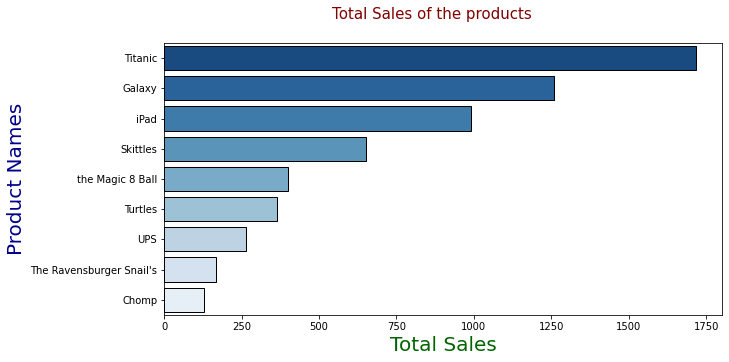

In [ ]:
# Average price of the products where we have negative reviews

fig,ax1=plt.subplots(1,1,figsize=(10,5))
top_customer_toys = h3["Product Name"]
customer_counts_toys= h3["Total Price"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=h3.sort_values("Total Price",ascending=False)["Product Name"])

ax1.set_ylabel("Product Names",size=20,color = "darkblue")
ax1.set_xlabel("Total Sales",size=20,color="darkgreen")
plt.suptitle("Total Sales of the products ",size =15,color="maroon")
plt.show()

Galaxy,iPad,Skittles,Chomp,Titanic,Turtles,The Ravensburger Snail's,RC,Penguin,UPS,the Magic 8 Ball are some products which has highest neg reviews .

In [ ]:
Counter(common_toy_df[common_toy_df.reviewAnalysis=="Positive"]["brand"]).most_common(20)[0:15]

[('Melissa & Doug', 5903),
 ('Fisher-Price', 1700),
 ('LEGO', 1183),
 ('Learning Resources', 925),
 ('LeapFrog', 674),
 ('Hasbro', 602),
 ('Ravensburger', 562),
 ('ALEX Toys', 547),
 ('Mattel', 532),
 ('Green Toys', 527),
 ('Monster High', 525),
 ('Stomp Rocket', 376),
 ('Gamewright', 359),
 ('Little Tikes', 350),
 ('Rhode Island Novelty', 347)]

In [ ]:
kl = ['Melissa & Doug',
 'Fisher-Price',
 'LEGO',
 'Learning Resources',
 'LeapFrog',
 'Hasbro',
 'Ravensburger',
 'ALEX Toys',
 'Mattel',
'Green Toys',
'Monster High',
 'Stomp Rocket',
'Gamewright',
 'Little Tikes',
 'Rhode Island Novelty']
op5=[];op6=[]
for i in kl:
  op5.append(common_toy_df[(common_toy_df["brand"]==i)&(common_toy_df.reviewAnalysis=="Positive")]["price"].values.sum())
  op6.append(common_toy_df[(common_toy_df["brand"]==i)&(common_toy_df.reviewAnalysis=="Positive")]["summary"].values[5])

In [ ]:
hj = pd.DataFrame({"Brand Names":kl,"Total Sales":op5,"Summary" : op6})
hj

,Brand Names,Total Sales,Summary
0,Melissa & Doug,101701.23,Great product.
1,Fisher-Price,111950.05,Nice toy
2,LEGO,118043.38,Good for kids
3,Learning Resources,18753.79,just what we were looking for
4,LeapFrog,16279.32,Finding Nemo
5,Hasbro,25566.81,"""I like Candyland"""
6,Ravensburger,17088.17,A Family Favorite
7,ALEX Toys,9668.09,Great
8,Mattel,21120.07,My 3 year old loves this game!
9,Green Toys,10885.80,Awesome ... cute .. affordable .. and American...


##### 9
Brands having Negative reviews

In [ ]:
Counter(common_toy_df[common_toy_df.reviewAnalysis=="Negative"]["brand"]).most_common(20)[0:15]

[('Melissa & Doug', 531),
 ('Fisher-Price', 196),
 ('Hasbro', 180),
 ('LEGO', 147),
 ('Ravensburger', 134),
 ('Mattel', 115),
 ('LeapFrog', 103),
 ('Learning Resources', 95),
 ('Gamewright', 78),
 ('Asmodee', 65),
 ('Cards Against Humanity LLC.', 62),
 ('Rio Grande Games', 59),
 ('VTech', 56),
 ('Toysmith', 53),
 ('Rhode Island Novelty', 53)]

In [ ]:
kl = ['Melissa & Doug',
'Fisher-Price',
'Hasbro',
'LEGO',
'Ravensburger',
'Mattel',
'LeapFrog',
'Learning Resources',
'Gamewright',
'Asmodee',
 'Cards Against Humanity LLC.',
 'Rio Grande Games',
 'VTech',
 'Toysmith',
 'Rhode Island Novelty']

op5=[];op6=[]
for i in kl:
  op5.append(common_toy_df[(common_toy_df["brand"]==i)&(common_toy_df.reviewAnalysis=="Negative")]["price"].values.mean())
  op6.append(common_toy_df[(common_toy_df["brand"]==i)&(common_toy_df.reviewAnalysis=="Negative")]["summary"].values[5])

In [ ]:
hj = pd.DataFrame({"Brand Names":kl,"Average Price":op5,"Summary" : op6})
hj

,Brand Names,Average Price,Summary
0,Melissa & Doug,17.397627,Great way to teach letter recognition for trai...
1,Fisher-Price,50.725357,Just ok
2,Hasbro,35.899389,Candy Land is what it is. Great starter game ...
3,LEGO,56.527755,Perfect for my daughter's homemade LEGO table!
4,Ravensburger,31.945896,Great game
5,Mattel,37.154435,20 Questions Indeed
6,LeapFrog,23.488058,Great Game
7,Learning Resources,19.512316,Shrug. It's just okay; age range is limited
8,Gamewright,11.990513,fun card game
9,Asmodee,33.389538,An excellent addition to my family board game ...


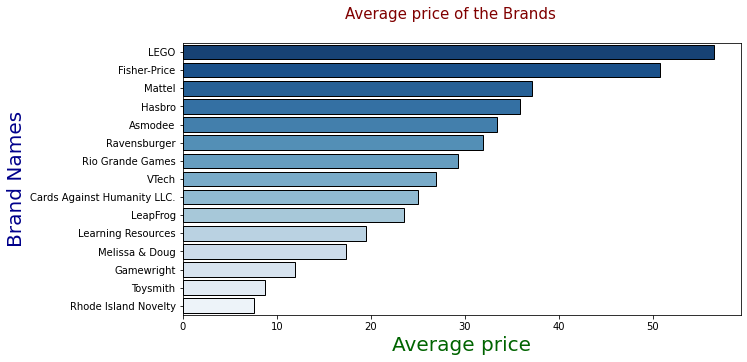

In [ ]:
# Average price of the products where we have negative reviews

fig,ax1=plt.subplots(1,1,figsize=(10,5))
top_customer_toys = hj["Brand Names"]
customer_counts_toys= hj["Average Price"]
sns.barplot(y = top_customer_toys, x = customer_counts_toys, palette="Blues_r", orient="h",edgecolor="black",ax=ax1 
            ,order=hj.sort_values("Average Price",ascending=False)["Brand Names"])

ax1.set_ylabel("Brand Names",size=20,color = "darkblue")
ax1.set_xlabel("Average price",size=20,color="darkgreen")
plt.suptitle("Average price of the Brands ",size =15,color="maroon")
plt.show()

#### Video Games and Toy and Games Dataset

##### 10

In [ ]:
display(video_data.head())
display(toy_data.head())

,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive
2,2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""",1st shipment received book instead game2nd shi...,1,Wrong key,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...,-0.200000,Negative
3,3,A1DLMTOTHQ4AST,0700099867,ampgreen,got version instead ps3 version turned mistake...,3,"awesome game, if it did not crash frequently !!",2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,...",-0.021147,Negative
4,4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""",dirt 2 xbox 360 okay game started playing game...,4,DIRT 3,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...,0.233766,Positive


,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
2,2,A21KH420DK0ICA,0439893577,capemaychristy,sides magnetic real plus youre entertaining ch...,5,love this!,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive
3,3,AR29QK6HPFYZ4,0439893577,dcrm,bought years ago daughter loves today holidays...,5,Daughters love it,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.700000,Highly Positive
4,4,ACCH8EOML6FN5,0439893577,DoyZ,stainless steel refrigerator space son play ma...,4,Great to have so he can play with his alphabet...,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.500000,Positive


In [ ]:
h3=pd.DataFrame({"Product_ID":["B0043KJW5M","B0024H7OF6","B004Z3MLLY","B0009XBY3A","B001U3Y5XE","B00BYD5LVA","B004KZ8P2Q","B0044T2KBU","B0001NE2AK"],
              "Product Name":['Galaxy','iPad','Skittles','Chomp','Titanic','Turtles',"The Ravensburger Snail's",'UPS','the Magic 8 Ball']}
              )
h3

,Product_ID,Product Name
0,B0043KJW5M,Galaxy
1,B0024H7OF6,iPad
2,B004Z3MLLY,Skittles
3,B0009XBY3A,Chomp
4,B001U3Y5XE,Titanic
5,B00BYD5LVA,Turtles
6,B004KZ8P2Q,The Ravensburger Snail's
7,B0044T2KBU,UPS
8,B0001NE2AK,the Magic 8 Ball


In [ ]:
neg_video_data = video_data[video_data["reviewAnalysis"]=="Negative"]
neg_toy_data = toy_data[toy_data["reviewAnalysis"]=="Negative"]

In [ ]:
neg_video_data.head(2)

,Unnamed: 0,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
2,2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""",1st shipment received book instead game2nd shi...,1,Wrong key,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...,-0.200000,Negative


In [ ]:
l = neg_video_data.groupby(by=["asin"]).count()["reviewPolarity"]
s1 =pd.DataFrame({"Product_Id":l.index,"count":l.values}).sort_values(by="count",ascending=False, ignore_index=True).head(20)

In [ ]:
s1

,Product_Id,count
0,B00178630A,192
1,B000FKBCX4,141
2,B00503E8S2,128
3,B0050SXLQC,125
4,B000FQ2DTA,115
5,B004FYEZMQ,114
6,B003JVKHEQ,112
7,B003O6G5TW,112
8,B0012N94WO,107
9,B007VTVRFA,105


In [ ]:
%%time
from collections import Counter 
# product names where we get highest neg reviews (toy data)
n1 = s1.Product_Id
m1 = neg_video_data
prd_id=[]
product_name=[]
c=1
for j in n1:
    product=[]
    count=[]
    d = m1 [ m1['asin'] == j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1
 
g3=pd.DataFrame()
g3["Product_ID"]=prd_id
g3["Product Name"]= product_name

CPU times: user 2min, sys: 1.77 s, total: 2min 2s
Wall time: 2min 18s


In [ ]:
s1["Product_names"]=g3["Product Name"]

In [ ]:
common_video_df.head(2)

,Unnamed: 0_x,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis,Unnamed: 0_y,price,brand,also_buy,description
0,5163,A30GPTKHN5SXKI,B00002R108,David M Farnworth,hamha think item allow save title choice heres...,5,A good item if you've owned many titles in you...,2002-12-18,Hamha! I think this item will allow you to sa...,Hamha! I think this item will allow you to sa...,0.152857,Positive,1024,44.99,InterAct,"['B008B8QO0I', 'B019Z2Z51W', 'B06WWF9KB6', 'B0...",['Brand new. Please note these do NOT work wit...
1,5163,A30GPTKHN5SXKI,B00002R108,David M Farnworth,hamha think item allow save title choice heres...,5,A good item if you've owned many titles in you...,2002-12-18,Hamha! I think this item will allow you to sa...,Hamha! I think this item will allow you to sa...,0.152857,Positive,3076,44.99,InterAct,"['B008B8QO0I', 'B019Z2Z51W', 'B06WWF9KB6', 'B0...",['Brand new. Please note these do NOT work wit...


In [ ]:
kl = pd.DataFrame({"Product_id":["B00503E8S2","B0050SXLQC","B004FYEZMQ","B007VTVRFA","B004HYK8Y8","B002AB7TX8","B007XVTR5S","B00DB9JYFY","B00005NZ1G"],
"Product_names":["Modern Warfare 2","Mercenaries","Mass Effect 3","Sims 3","Skyrim","Demon's Souls","Black Ops 2","Titans","Halo 2"]})
op5=[];op6=[]
for i in kl.Product_id:
  #op5.append(common_video_df[(common_video_df["asin"]==i)&(common_video_df.reviewAnalysis=="Negative")]["price"].values.mean())
  op6.append(neg_video_data[(neg_video_data["asin"]==i)&(neg_video_data.reviewAnalysis=="Negative")]["Reviews_orignal"].values)


In [ ]:
kl["reviews"]=op6

In [ ]:
kl

,Product_id,Product_names,reviews
0,B00503E8S2,Modern Warfare 2,[I want my 60 back...90% mw2 clone! plain and ...
1,B0050SXLQC,Mercenaries,[This is not Survival Horror any more.Not to b...
2,B004FYEZMQ,Mass Effect 3,"[Let me start off with some basics. First, I d..."
3,B007VTVRFA,Sims 3,[Had a horrible launch week(s) but after it go...
4,B004HYK8Y8,Skyrim,"[First, let me say that I ended up with this h..."
5,B002AB7TX8,Demon's Souls,[Finding it hard to believe all the hype with ...
6,B007XVTR5S,Black Ops 2,[I swear the game feels like an old PS2 SOCOM ...
7,B00DB9JYFY,Titans,"[As many now have heard, the game has no campa..."
8,B00005NZ1G,Halo 2,[This is nominated for Chris's Xbox Game of th...


Finding Cause of the neg sentiment

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# word cloud for video data in common dataset(neg sentiments)
for i in kl["reviews"]:
  plt.figure(figsize=(19,8))
  word= WordCloud(max_words=200,stopwords=stopwords.words("english")).generate(str(i))
  plt.imshow(word)
  plt.show()

In [ ]:
neg_video_data.reset_index(inplace=True)
neg_toy_data.reset_index(inplace=True)

In [ ]:
display(neg_video_data.shape)
display(neg_toy_data.shape)

(61003, 13)

(17560, 13)

In [ ]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


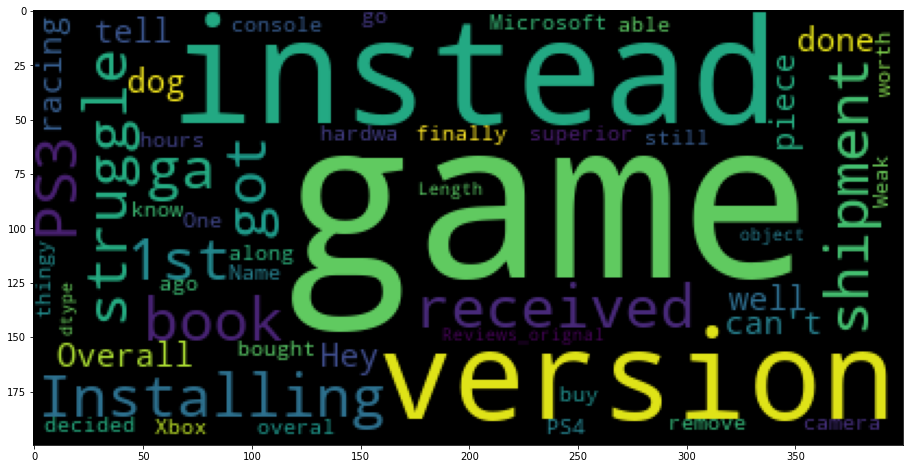

In [ ]:
# word cloud for video data in common dataset(neg sentiments)
plt.figure(figsize=(19,8))
word= WordCloud(max_words=100,stopwords=stopwords.words("english")).generate(str(neg_video_data["Reviews_orignal"]))
plt.imshow(word)
plt.show()


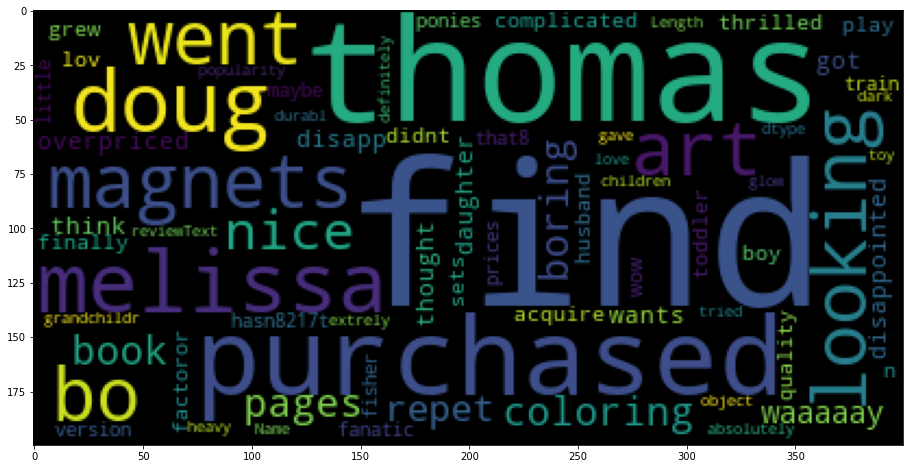

In [ ]:
# word cloud for toy data in common dataset(neg sentiments)
plt.figure(figsize=(19,8))
word= WordCloud(max_words=100,stopwords=stopwords.words("english")).generate(str(neg_toy_data["reviewText"]))
plt.imshow(word)
plt.show()

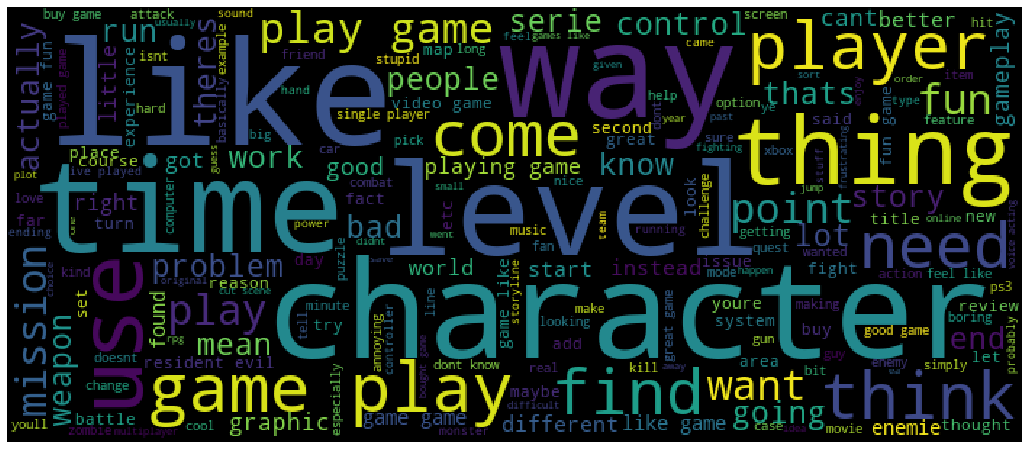

In [ ]:
plt.figure(figsize=(20,8))
allwords = ' '.join([i for i in neg_video_data["reviewText"]])
word= WordCloud(width = 700, height = 300, random_state =1, max_font_size =100 ,max_words=200,stopwords=stopwords.words("english"), background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

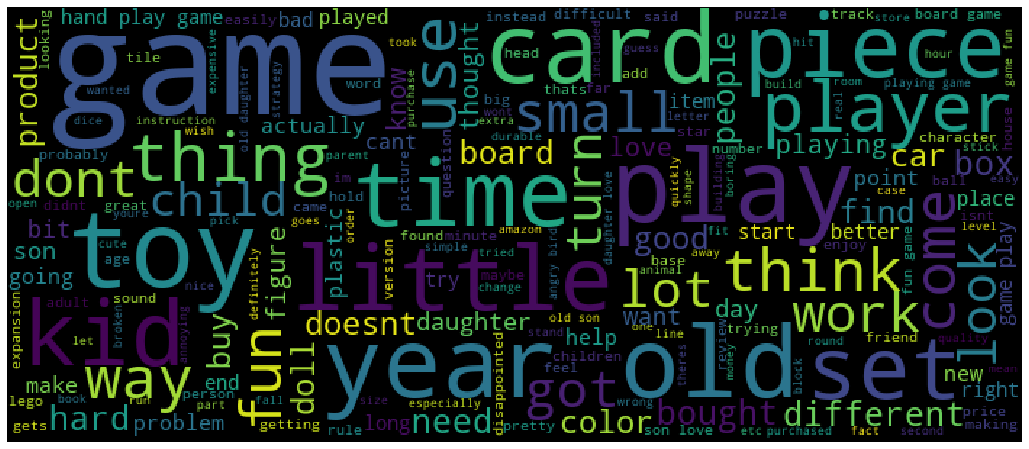

In [ ]:
plt.figure(figsize=(20,8))
allwords = ' '.join([i for i in neg_toy_data["reviewText"]])
word= WordCloud(width = 700, height = 300, random_state =1, max_font_size = 100,max_words=200, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()